<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [7]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

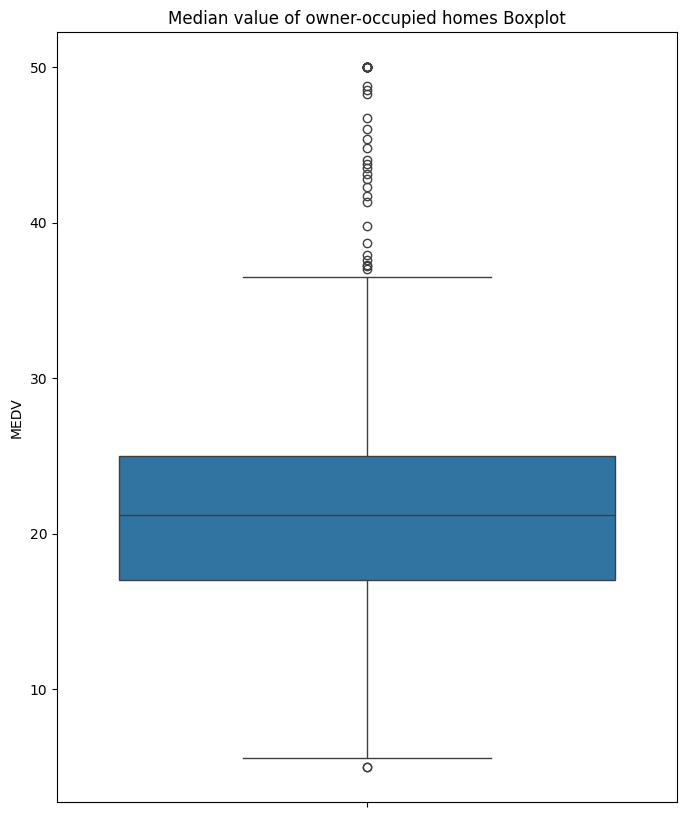

In [29]:
pyplot.figure(figsize=(8,10))
sns.boxplot(y=boston_df.MEDV)
pyplot.title("Median value of owner-occupied homes Boxplot")
pyplot.show()

#### It shows the average of median values are around 22, the first quartile is smaller than 10 and thrid quartile is higher than 30.

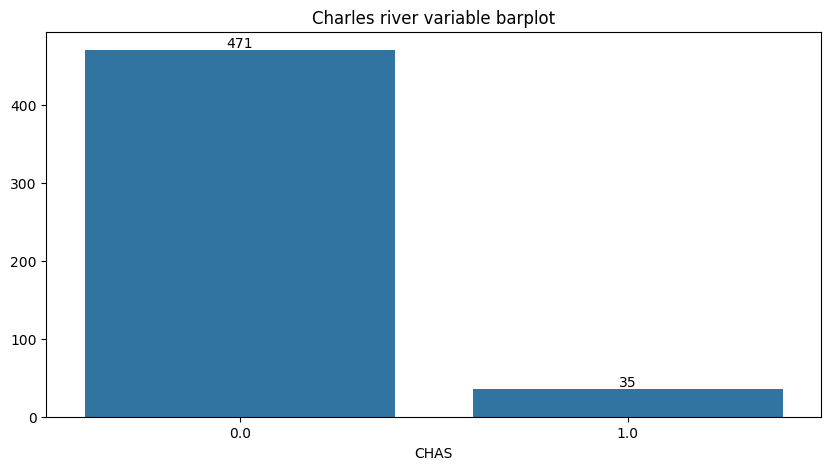

In [23]:
pyplot.figure(figsize=(10,5))
charles_df=boston_df['CHAS'].value_counts()
sns.barplot(x=charles_df.index, y=charles_df.values)
for i, value in enumerate(charles_df.values):
    pyplot.text(i,value+0.1,str(value), ha='center', va='bottom')
pyplot.title("Charles river variable barplot")
pyplot.show()

#### It shows there are 471 are not tract bounds river and 35 tract bounds river. 

In [25]:
boston_df.loc[(boston_df["AGE"]<=35),'age_group'] = '35 years and younger'
boston_df.loc[(35<boston_df["AGE"])&(boston_df["AGE"]<=70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(70<boston_df["AGE"]),'age_group'] = '70 years and older'

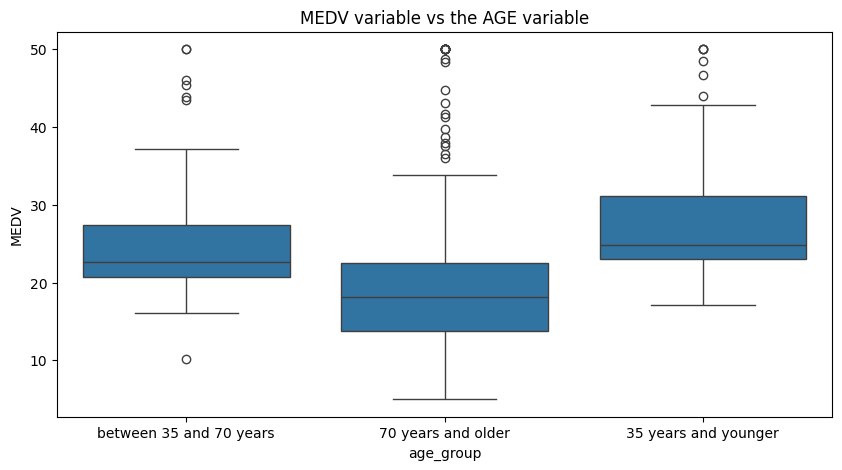

In [28]:
pyplot.figure(figsize=(10,5))
sns.boxplot(x=boston_df.age_group,y=boston_df.MEDV)
pyplot.title("MEDV variable vs the AGE variable")
pyplot.show()

#### Above boxplots shows the median value of 70 years and older age group is the lowest and then between 35 and 70 years old. The median value of 35 years and tounger is the highes

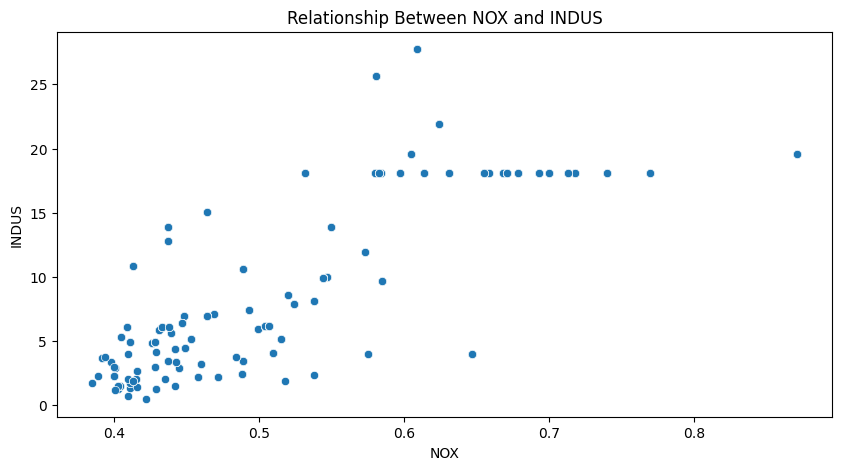

In [30]:
pyplot.figure(figsize=(10,5))
sns.scatterplot(x=boston_df.NOX,y=boston_df.INDUS)
pyplot.title("Relationship Between NOX and INDUS")
pyplot.show()

#### There is a linear relationship during NOX from 0 to 0.6.

<Figure size 1000x800 with 0 Axes>

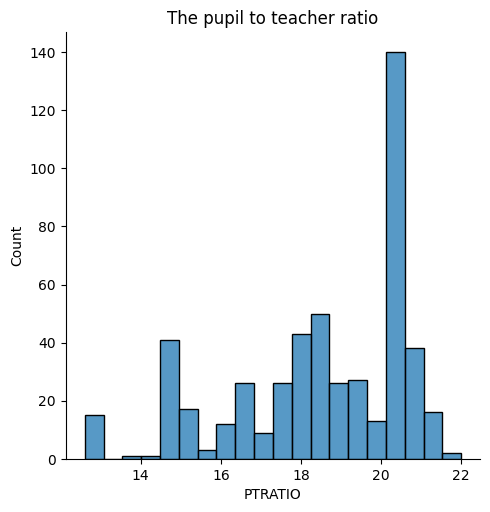

In [37]:
pyplot.figure(figsize=(10,8))
sns.displot(x=boston_df.PTRATIO, bins=20, kde=False)
pyplot.title("The pupil to teacher ratio")
pyplot.show()

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
Null Hypothesis: Two group MEDV's mean are the same.
Alternative Hypothesis: Two group MEDV's mean are different.

In [38]:
charles_df

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

In [41]:
CHAS_N=boston_df[boston_df['CHAS']==0].MEDV
CHAS_Y=boston_df[boston_df['CHAS']==1].MEDV

In [46]:
scipy.stats.ttest_ind(CHAS_N,CHAS_Y,axis=0,equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

#### Since P-value is smaller than alpha value 0.05, then we can reject null hypothesis and conclude the means are significantly different. 

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
Null Hypothesis: Three group MEDV's mean are the same.
Alternative Hypothesis: Three group MEDV's mean are different.

In [64]:
Young=boston_df[boston_df['age_group'] == '35 years and younger'].MEDV
Medium = boston_df[boston_df['age_group'] == 'between 35 and 70 years'].MEDV
Old= boston_df[boston_df['age_group'] == '70 years and older'].MEDV

In [65]:
scipy.stats.f_oneway(Young,Medium,Old,axis=0)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

#### Since P-value is smaller than alpha value 0.05, then we can reject null hypothesis and conclude the means are significantly different. 

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
Null Hypothesis: NOX is not correlated with INDUS
Alternative Hypothesis: NOX is correlated with INDUS

In [67]:
scipy.stats.pearsonr(boston_df.NOX,boston_df.INDUS)

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### Since P-value is smaller than alpha value 0.05, then we can reject null hypothesis and conclude these two variable are correlated.

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
Null Hypothesis: weighted distances to five Boston employment centres are not related to median value. Alternative Hypothesis: weighted distances to five Boston employment centres are related to median value.

In [68]:
x=boston_df.DIS
y=boston_df.MEDV

In [69]:
x=sm.add_constant(x)

In [70]:
results=sm.OLS(y,x).fit()

In [71]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 05 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        12:24:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
scipy.stats.pearsonr(boston_df.DIS,boston_df.MEDV)

PearsonRResult(statistic=0.2499287340859039, pvalue=1.2066117273371074e-08)

#### Since P-value of regression analysis is smaller than alpha value 0.05, then we can reject null hypothesis and conclude these two variable are correlated. Furthermore, the correlation results of Pearson test is 0.25. Then we can conclude there is a weak correlation between both variables.